In [53]:
import csv
import json
import sys, pymysql
import pandas as pd

#與MySQL建立連線
conn = pymysql.connect(host='localhost',port=3306,user='root',password='123456',db='pm25')
cursor = conn.cursor()
try:
    sql_str="select * from pm25_2019"
    cursor.execute(sql_str)
    result = cursor.fetchall()
    l = len(result)
    list_data = []
    for i in range(5):
        for row in result:
            list_row = list(row)
            list_data.append(list_row)
except:
    print('unable to fetch data from db')

cursor.close()
conn.close() 

df = pd.DataFrame(list_data,columns=['timestamp','date','time','device_id','Temperature','Humidity','PM25'])
df['PM25'] = df['PM25'].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df["hour"] = df['time'].astype(str).str.split(':',expand = True)[0].str.split(' ',expand = True)[2].astype(int)
#print(list_data)

data = pd.DataFrame(df,columns=['hour', 'Temperature', 'Humidity', 'PM25'])
X_train = data.iloc[:5000,0:3]
y_train = data.iloc[:5000,3]
X_test = data.iloc[5000:5355,0:3]
y_test = data.iloc[5000:5355,3]

In [26]:
X_train = data.iloc[:5355,0:3]
y_train = data.iloc[:5355,3]

,hour,Temperature,Humidity
0,9,24.74,65.89
1,10,24.66,66.01
2,11,24.62,64.62
3,12,24.27,64.53
4,13,24.11,65.08
5,14,24.01,65.89
6,15,24.00,67.02
7,16,23.97,67.13
8,17,23.99,67.83
9,18,23.91,68.99


In [27]:
from sklearn import preprocessing
#data_X = preprocessing.scale(X) #正規化數據
#把數據壓縮至0~1
data_X = preprocessing.minmax_scale(X_train, feature_range(0,1)) 

NameError: name 'feature_range' is not defined

In [ ]:
#決策數訓練 (最佳值)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=11)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

In [2]:
from sklearn.tree import DecisionTreeClassifier

#criterion使用entropy來計算訊息增益 
#max_depth是指樹狀圖的最大深度
clf=DecisionTreeClassifier(max_depth=2,criterion='entropy')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.0796; test score: 0.0647887323943662


In [14]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.7348182437817056; test score: 0.8585794359784467


In [15]:
#儲存模型
from sklearn.externals import joblib
joblib.dump(clf,"./DecisionTreeRegressor.pkl")

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['./DecisionTreeRegressor.pkl']

In [80]:
from sklearn.externals import joblib

#读取Model
model = joblib.load('./DecisionTreeRegressor.pkl')

#测试读取后的Model
print(model.predict(X_test))

[ 6  6  6  6  6  6  6  6  6 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13  6 13  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6 13 13 13 13 13 13 13 13 13 13 13 13  6
 13 13 13 13 13 13  6  6  6  6  6 13 13 13 13 13 13 13 13 13 13 13  6  6
 13 13 13 13 13 13 13 13 13 13 13 13 13  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  1  6  6  6
  6  6  6  6  6  6  6  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 13 13
 13  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6

In [83]:
#模型評分
import numpy as np
#from sklearn.utils import check_arrays

true = np.asarray(y_test)
pred = model.predict(X_test)

aList = []
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in range(len(true)-1):
    a = mean_absolute_percentage_error(true[i+1], pred[i])
    if a > 1000:
        a = 0;
    aList.append(a)

mean(aList)

C:\Users\Big data\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':


64.64661850448186

In [6]:
#參數選擇max_depth
def cv_score(d):
    clf = DecisionTreeRegressor(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

In [8]:
#交叉驗證最佳參數
import numpy as np
depths = range(1, 25)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best_param:%d; best_score:%.6f'%(best_param,best_score))

best_param:20; best_score:1.000000


In [12]:
cv_scores

[-0.0014969904635486753,
 0.06993513421939856,
 0.20600919204422352,
 0.33729616904309523,
 0.41589239377230425,
 0.4721800823585832,
 0.6186269655551231,
 0.6969871372476479,
 0.7899950839609515,
 0.8583258070809996,
 0.8957827571563476,
 0.9372970547731919,
 0.9769843532097289,
 0.9893836915786595,
 0.9949967283270034,
 0.9977459281117154,
 0.9987789743246444,
 0.9999634790385715,
 0.9999950559669114,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

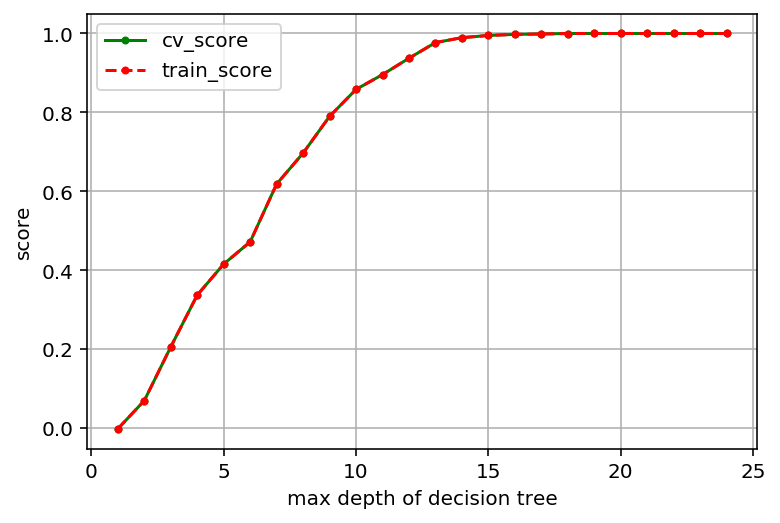

In [11]:
#畫圖
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cv_score')
plt.plot(depths, cv_scores, '.r--', label='train_score')
plt.legend()

In [ ]:
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel('min samples of decision tree')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cv_score')
plt.plot(values, cv_scores, '.r--', label='train_score')
plt.legend()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=3)
model.fit(X_train, y_train)
#儲存模型
from sklearn.externals import joblib
joblib.dump(clf,"./RandomForestClassifier.pkl")

['./RandomForestClassifier.pkl']

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is 

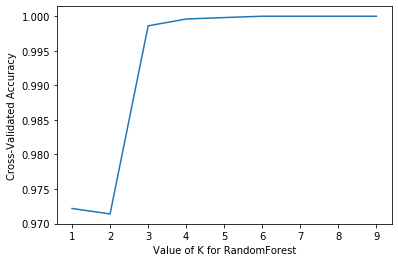

In [21]:
import matplotlib.pyplot as plt #可视化模块
from sklearn.model_selection import cross_val_score
#建立测试参数集
k_range = range(1, 10) #測試參數
k_scores = []
#藉由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    model = RandomForestClassifier(n_estimators=k)
    #線性回歸問題評分
    #loss = -cross_val_score(knn, X_train, Y_train, cv=10, scoring='mean_squared_error')#轉成負值
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')#分10組
    k_scores.append(scores.mean()) #平均分數
    #k_scores.append(loss.mean())
#可视化数据
plt.plot(k_range, k_scores) #x軸為測試參數數值 Y軸為參數對應模型評分
plt.xlabel('Value of K for RandomForest')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [22]:
def cv_score(d):
    clf = RandomForestClassifier(n_estimators=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

In [23]:
#交叉驗證最佳參數
import numpy as np
depths = range(1, 10)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best_param:%d; best_score:%.6f'%(best_param,best_score))

best_param:3; best_score:1.000000


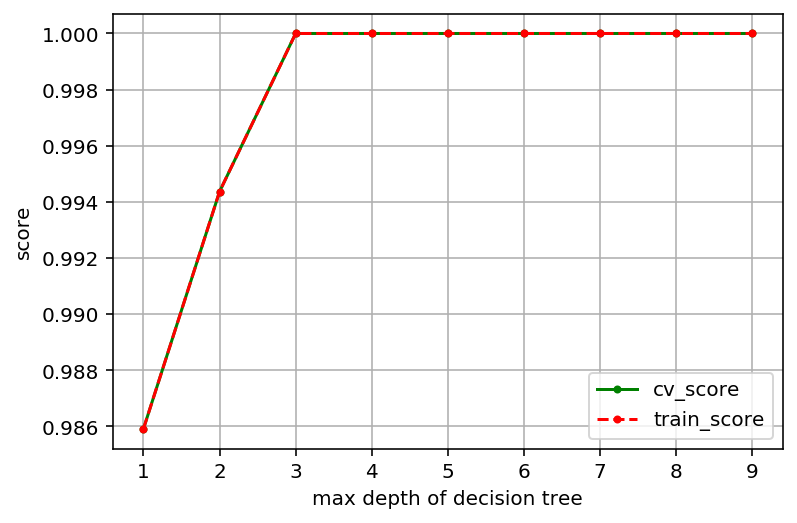

In [24]:
#畫圖
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cv_score')
plt.plot(depths, cv_scores, '.r--', label='train_score')
plt.legend()

In [86]:
import numpy as np
true = [1,2,3]
pred = [1,2,3]
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(true, pred)

0.0